In [13]:
from qiskit import QuantumCircuit, transpile, assemble
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator
import numpy as np

# Define the parameters
f = 6
g = 2
m1 = 2
m2 = 2
w0 = 2
# q = 8

In [14]:

# Define the position operators for the circle
def Tm_operator(q, m):
    Tm = np.zeros((q, q))
    for i in range(q):
        Tm[(i + m) % q, i] = 1
    return Tm

# Define the shift operator S
def S_operator(q):
    T1 = Tm_operator(q, 1)
    T_minus_1 = Tm_operator(q, -1)

    S = np.kron(T1, np.array([[1, 0], [0, 0]])) + np.kron(T_minus_1, np.array([[0, 0], [0, 1]]))
    return S

shift_operator = S_operator(q=8)
print("S:")
print(shift_operator)

S:
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


In [15]:
# STEP 1

# Create a QuantumCircuit with 4 qubits and classical bits
qc = QuantumCircuit(4, 4)

# |φ>0 = |w0>|c0>=|2>|1> = |010>|1>
qc.x(0)
qc.x(2)

# Apply the sequence of operations f times
for i in range(f):
    # Apply the Hadamard gate on q0 (coin operator)
    qc.h(0)
    
    # Apply the shift operator on all qubits
    qc.unitary(shift_operator, [0, 1, 2, 3])

# # Measure all qubits
# qc.measure([0, 1, 2, 3], [0, 1, 2, 3])
    
# # Transpile the circuit for the target backend
# simulator = AerSimulator()
# qc_transpiled = transpile(qc, simulator)

# # Execute the circuit and get the result
# job = simulator.run(assemble(qc_transpiled))
# result = job.result()

# print(qc)

# # Get the counts of each measurement outcome
# counts = result.get_counts()
# print("Measurement counts:", counts)

# # Plot the histogram of measurement outcomes
# plot_histogram(counts)

In [16]:
# STEP 3

# Define the 8x8 position operator matrix
t_m1 = Tm_operator(8, m1)

# Define the 2x2 identity matrix
identity_matrix = np.eye(2)

# Take the tensor product
# |ϕ>m1 = Tm1 ⊗ I
tensor_product_matrix = np.kron(t_m1, identity_matrix)

print("Tensor Product Matrix: (|ϕ>m1), " + "m1 = " + str(m1))
print(tensor_product_matrix)


# Apply the tensor product matrix on the quantum circuit
qc.unitary(tensor_product_matrix, [0, 1, 2, 3])
# # Measure all qubits
# qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# # Transpile the circuit for the target backend
# simulator = AerSimulator()
# qc_transpiled = transpile(qc, simulator)

# # Execute the circuit and get the result
# job = simulator.run(assemble(qc_transpiled))
# result = job.result()

# # Get the counts of each measurement outcome
# counts = result.get_counts()
# print("Measurement counts:", counts)

# # Plot the histogram of measurement outcomes
# plot_histogram(counts)
# # print(qc)

Tensor Product Matrix: (|ϕ>m1), m1 = 2
[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]]


In [17]:
# continuation of step 3

# Apply the sequence of operations g times
for i in range(g):
    # Apply the Hadamard gate on qubit 2 (indexed as q3)
    qc.h(0)
    
    # Apply the shift operator on all qubits
    qc.unitary(shift_operator, [0, 1, 2, 3])

# # Measure all qubits
# qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# # print(qc)
# # Transpile the circuit for the target backend
# simulator = AerSimulator()
# qc_transpiled = transpile(qc, simulator)

# # Execute the circuit and get the result
# job = simulator.run(assemble(qc_transpiled))
# result = job.result()

# # Get the counts of each measurement outcome
# counts = result.get_counts()
# print("Measurement counts:", counts)

# # Plot the histogram of measurement outcomes
# plot_histogram(counts)

In [18]:
# Step 5 

# Define the 8x8 position operator matrix
T_minus_m2 = Tm_operator(8, -m2)

# Define the 2x2 identity matrix
identity_matrix = np.eye(2)

# Take the tensor product
# (T−m2 ⊗ I)
tensor_product_matrix = np.kron(T_minus_m2, identity_matrix)

print("Tensor Product Matrix:")
print(tensor_product_matrix)


# Apply the tensor product matrix on the quantum circuit
qc.unitary(tensor_product_matrix, [0, 1, 2, 3])
# # Measure all qubits
# qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# # Transpile the circuit for the target backend
# simulator = AerSimulator()
# qc_transpiled = transpile(qc, simulator)

# # Execute the circuit and get the result
# job = simulator.run(assemble(qc_transpiled))
# result = job.result()

# # Get the counts of each measurement outcome
# counts = result.get_counts()
# print("Measurement counts:", counts)

# # Plot the histogram of measurement outcomes
# plot_histogram(counts)
# # print(qc)

Tensor Product Matrix:
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


Inverse shift operator:
[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]]
     ┌───┐┌───┐┌──────────┐┌───┐┌──────────┐┌───┐┌──────────┐┌───┐┌──────────┐»
q_0: ┤ X ├┤ H ├┤0         ├┤ H ├┤0         ├┤ H ├┤0         ├┤ H ├┤0         ├»

/tmp/ipykernel_186/2785012607.py:43: DeprecationWarning: Using a qobj for run() is deprecated as of qiskit-aer 0.9.0 and will be removed no sooner than 3 months from that release date. Transpiled circuits should now be passed directly using `backend.run(circuits, **run_options).
  job = simulator.run(assemble(qc_transpiled))


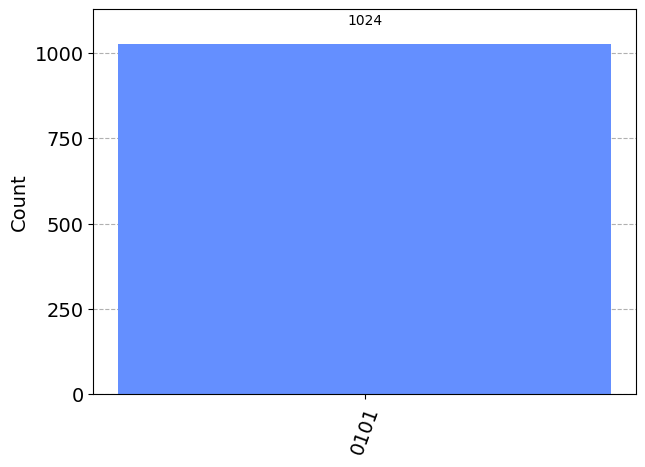

In [19]:
# Step 7

# Define the inverse shift operator S_inv
def S_inv_operator(q):
    T1 = Tm_operator(q, 1)
    T_minus_1 = Tm_operator(q, -1)
    
    # print("Tm:")
    # print(T1)
    # print(T_minus_1)
    
    S = np.kron(T_minus_1, np.array([[1, 0], [0, 0]])) + np.kron(T1, np.array([[0, 0], [0, 1]]))
    return S

inv_shift_opr = S_inv_operator(q=8)
print("Inverse shift operator:")
print(inv_shift_opr)

final = f+g
# print(final)
# Apply the sequence of operations f times
for i in range(final):
    
    # Apply the shift operator on all qubits
    qc.unitary(inv_shift_opr, [0, 1, 2, 3])
    # Apply the Hadamard gate on qubit 2 (indexed as q3)
    qc.h(0)
    # # Measure all qubits
    # qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# Measure all qubits
qc.measure([0, 1, 2, 3], [0, 1, 2, 3])

# qc.reset(0)

    
# print(qc)
# Transpile the circuit for the target backend
simulator = AerSimulator()
qc_transpiled = transpile(qc, simulator)

# Execute the circuit and get the result
job = simulator.run(assemble(qc_transpiled))
result = job.result()

print(qc)

# Get a single measurement outcome
counts = result.get_counts()
print("Measurement counts:", counts)
# measurement_outcome = list(counts.keys())[0]  # Assuming only one key
# print("Measurement outcome:", measurement_outcome)
plot_histogram(counts)

# # Get the counts of each measurement outcome
# counts = result.get_counts()
# print("Measurement counts:", counts)

# # Plot the histogram of measurement outcomes
# plot_histogram(counts)

In [20]:
# STEP 8

q = 8

# Find the key with the highest value
# print(counts)
max_key = max(counts, key=counts.get)

print("Final measurement:", max_key)
# print("Value:", counts[max_key])

# Extract the first three digits of the max_key
m3_dash_bin = max_key[:3]

# Convert the first three digits to decimal
m3_dash = int(m3_dash_bin, 2)

print("Extracting w0:", m3_dash_bin)
print("Decimal value of w0:", m3_dash)

w0 = 2

m3 = (m3_dash - w0) % q

print("m3:", m3)

if m3 == 0:
    print("m1 = m2")
elif m3 >= 1 and m3 <= (q - 1) / 2:
    print("m1 > m2")
elif m3 >= (q + 1) / 2 and m3 <= q - 1:
    print("m1 < m2")


Final measurement: 0101
Extracting w0: 010
Decimal value of w0: 2
m3: 0
m1 = m2
